#Tercer Taller Métodos Númericos


---


**Autor**: Carlos Andres Rodallega Millán

**Código**: 2071142


**Programa**: Física - 3146

**Curso**: Métodos Númericos - (111366M)


**Presentado a**: Miguel Angel Vargas Valencia

**Fecha de entrega:** 30/06/2022

In [ ]:
#Librerias a usar en este Taller.
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer
import pandas as pd
from sympy.matrices import *

##Punto 1: Situación problema (Solución de ecuación no Lineal)
---
Considere la siguiente situación problema, teniendo en cuenta la ecuación de estado de van der Walls:
$$\left( P+\frac{a}{\hat{V²}}\right)\left(\hat{V}-b\right)= RT $$

Se debe calcular el volumen específico V de dióxido de carbono con las siguientes condiciones:

\begin{eqnarray} 
  T=300k & P=1.0*atm &R=0.082054 \frac{J}{Kg*K} & \\
  & a= 3.592 Pa*\frac{m^6}{kg²} &b=0.04267 \frac{m²}{kg} & \\
\end{eqnarray}



1.   Determine la función a la cual se le debe calcular la primera raíz positiva
para solucionar el problema.

2.   Graque la función en un domino de los reales positivos de modo que se
visualice la primera raíz positiva.





###Solución Punto 1.

La función a la cuál se le deben determinar la primera raíz positiva, es la siguiente:
$$\left( P+\frac{a}{\hat{V²}}\right)\left(\hat{V}-b\right) -RT=0 $$
Siendo $\hat{V}$ la variable.


In [ ]:
#Definición de la función:
def f(x):
  f = (101325+(3.592/x**2))*(x-0.04267)-(300*0.082054)
  return f


In [ ]:
#Definición de la función derivada:
def df(x):
  df = (101325-(449/(125*(pow(x,2))))+(1915883/(6250000*(pow(x,3)))))
  return df

###Solución Punto 2.

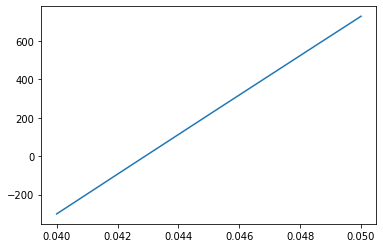

In [ ]:
 x= np.linspace(0.04,0.05,10000)
h=f(x)
plt.plot(x,h)

##Punto 2: Método de Bisección.
---
Presente una breve explicación teórica (utilizando ecuaciones en Latex) del
método de la Bisección y desarrolle un código en Python que implemente el
método para solucionar el problema del ejercicio 1 y cumpla con las siguientes
condiciones:

1.   Usted puede elegir libremente el intervalo inicial.

2.   Las condiciones de parada son: obtener un error absoluto de las aproxima-
ciones sucesivas menor a 10−6 o realizar 100 iteraciones.

3.   Debe imprimir o mostrar cada una de las aproximaciones de la raíz obtenidas
en cada paso
4.   Debe guardar en una lista todos los errores absolutos obtenidos en las iteraciones.











### Breve explicación sobre la teoría.
Este es el primer método con el cual se empieza la teoría de solución de ecuaciones no lineales, es el más antiguo para determinar las raíces de una ecuación. Se basa directamente en el teorema de Bolzano. Consiste en partir de un intervalo $[x0,x1]$ tal que $f(x0)f(x1) < 0$, por lo que sabemos que existe, al menos, una raíz real. A partir de este punto se va reduciendo el intervalo sucesivamente hasta hacerlo tan pequeño como exija la precisión que hayamos decidido emplear.

**TEOREMA DE BOLZANO**:
Sea $f \in C[a,b] $ tal que $f(a)f(b) <0 $, entonces existe $p\in (a,b)$ tal que $f(p)=0$. 
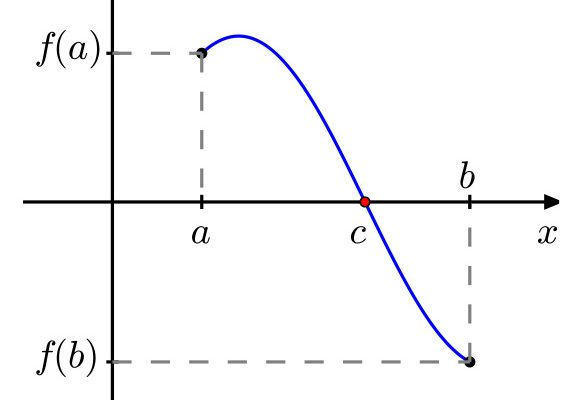 >

Para este algoritmo es necesario suministrar al programa un número máximo de iteraciones basadas en la tolerancia o Error absoluto que queremos en nuestra solución hallada.


Ahora, Vamos a constriur una sucesión de $a_0, a_1, a_2,...,a_n$ y $a_0, a_1, a_2,...,a_n$ tal que la tolerancia tenga la siguiente manera:

$$tol_k = |b_k-a_k|< 10^{-5} $$

$$tol_k=|b_k-a_k|=\frac{|b_{k-1}-a_{k-1}|}{2^1}=\frac{|b_{k-2}-a_{k-2}|}{2^2}=...=\frac{|b_{0}-a_{0}|}{2^k} $$

Garantiza que M. Bisección converge.


Visualmente, el Método de la bisección se puede ver así.

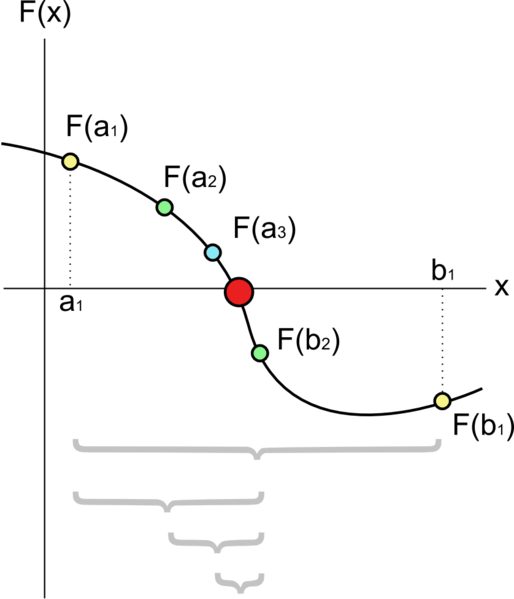

###Solución Punto 1.
---
El intervalo de solución es de libre elección $(a,b)$ y son las componentes iniciales del siguiente código:



In [ ]:
#Definir métodos de bisección
a = 0.01
b = 1

def bisec(f, a, b, tolEsp):
  n=0
  Error1 = 10
  valor = True
  c= 0.001
  ListBisec=[]
  while Error1>tolEsp and n<100:
    n=n+1
    print("Ciclo",n, ",  c=",c,",  f(c)=",f(c),"  Error Absoluto:",Error1)  
    if f(a)*f(b)<0:
      crold1= c
      if f(a)<f(b):
        c= (a+b)/2
        if f(c)*f(a)<0:
          b=c
        else:
          a=c
      Error1 = abs(c-crold1)
      ListBisec.append(Error1)
    else:
      print("Mejore su intervalo de prueba")
  return f(c), c, ListBisec

### Solución Punto 2.
En el código anterior, podemos apreciar que podemos ingresar las condiciones de parada de nuestro método a voluntada, en el caso específico cuando queramos las condiciones dadas en el taller, Aproximaciones sucesivas con error absoluto menor a $ 10^{-6}$ o que se lleguen a 100 iteraciones como máximo, solo se deben colocar estos datos en la función de entrada.

### Solución Punto 3.

---




In [ ]:
Fbisec, xbisec, ListBisec = bisec(f,a,b,10e-6) 

Ciclo 1 ,  c= 0.001 ,  f(c)= -153925.46895   Error Absoluto: 10
Ciclo 2 ,  c= 0.505 ,  f(c)= 46827.482918875605   Error Absoluto: 0.504
Ciclo 3 ,  c= 0.2575 ,  f(c)= 21754.67150811104   Error Absoluto: 0.2475
Ciclo 4 ,  c= 0.13375 ,  f(c)= 9222.353033941828   Error Absoluto: 0.12375
Ciclo 5 ,  c= 0.07187500000000001 ,  f(c)= 2954.8870534763714   Error Absoluto: 0.061875
Ciclo 6 ,  c= 0.0409375 ,  f(c)= -203.87512148840372   Error Absoluto: 0.030937500000000007
Ciclo 7 ,  c= 0.056406250000000005 ,  f(c)= 1382.7171265063294   Error Absoluto: 0.015468750000000003
Ciclo 8 ,  c= 0.048671875 ,  f(c)= 592.6243234802978   Error Absoluto: 0.007734375000000002
Ciclo 9 ,  c= 0.0448046875 ,  f(c)= 195.50066234578347   Error Absoluto: 0.003867187500000001
Ciclo 10 ,  c= 0.042871093750000006 ,  f(c)= -3.847363815059918   Error Absoluto: 0.001933593749999997
Ciclo 11 ,  c= 0.043837890625 ,  f(c)= 95.9032445286208   Error Absoluto: 0.000966796874999995
Ciclo 12 ,  c= 0.0433544921875 ,  f(c)= 46.048057

### Solución Punto 4.


---
Todas los errores absolutos fueron guardados en listas.


In [ ]:
ListBisec

[0.504,
 0.2475,
 0.12375,
 0.061875,
 0.030937500000000007,
 0.015468750000000003,
 0.007734375000000002,
 0.003867187500000001,
 0.001933593749999997,
 0.000966796874999995,
 0.0004833984374999975,
 0.00024169921874999528,
 0.00012084960937500111,
 6.0424804687500555e-05,
 3.0212402343750278e-05,
 1.5106201171878608e-05,
 7.553100585935835e-06]

##Punto 3: Método de la Regla Falsa.




---


Presente una breve explicación teórica (utilizando ecuaciones en Latex) del método de la Regla Falsa y desarrolle un código en Python que implemente el método para solucionar el problema del ejercicio 1 y cumpla con las siguientes condiciones:


1.   El intervalo debe ser el mismo que eligio en el ejercicio 2.

2.   Las condiciones de parada son: obtener un error absoluto de las aproxima-
ciones sucesivas menor a 10−6 o realizar 100 iteraciones.

3.   Debe imprimir o mostrar cada una de las aproximaciones de la raíz obtenidas
en cada paso.

4.   Debe guardar en una lista todos los errores absolutos obtenidos en las iteraciones.

### Breve explicación.

Si tengo una recta de la forma $y=mx+b$ entonces la solución es de la forma $$ x=-\frac{b}{m}$$

*   Si la función cambia de  signo en intervalo[a,b], este se divide por el cero de la recta que une los puntos (a,f(a)) y (b, f(b)):
$$ c= b-f(b)\frac{a-b}{f(a)-f(b)}$$ 

*   Se evalúa la función en el cero de dicha recta.


*   La raíz se considera en el sub-intervalo, izquierdo o derecho, dentro del cual ocurre un cambio de signo.
*   EL proceso se repite hasta obtener una aproximación que cumpla con una condición de parada.





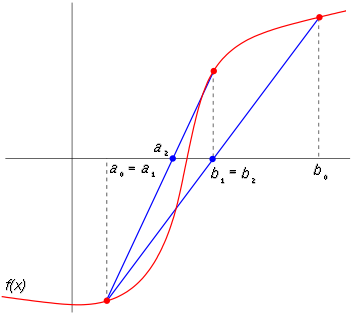

### Solución Punto 1.

---
En el siguiente código, se podrá ver las condiciones de parada, de la misma manera que se había hecho en el método de bisección.



In [3]:
#Código Regla falsa
def falserule(f, a, b, ErrorEsp):
  n=0
  Error2 = 10
  c= 0.001
  Listfalserule=[]
  while (Error2>ErrorEsp and 100>n):
    n=n+1
    print("Ciclo",n, ",  c=",c,",  f(c)=",f(c),"  Error Absoluto:",Error2)  
    if f(a)*f(b)<0:
      if f(a)<f(b):
        crold2 =c
        c= b-f(b)*(a-b)/(f(a)-f(b))
        if f(c)*f(a)<0:
          b=c
        else:
          a=c
      Error2=abs(c-crold2)
      Listfalserule.append(Error2)
    else:
      print("Mejore su intervalo de prueba")
  return f(c), c, Listfalserule

###Solución Punto 2.

---
En el código anterior, podemos apreciar que podemos ingresar las condiciones de parada de nuestro método a voluntada, en el caso específico cuando queramos las condiciones dadas en el taller, Aproximaciones sucesivas con error absoluto menor a $ 10^{-6}$ o que se lleguen a 100 iteraciones como máximo, solo se deben colocar estos datos en la función de entrada.


###Solución Punto 3.

---



In [4]:
Ffalserule, xfalserule, Listfalserule = falserule(f,a,b,10e-6)

NameError: ignored

### Solución Punto 4.

---



In [ ]:
Listfalserule

##Punto 4: Método de Newton-Raphson.
Presente una breve explicación teórica (utilizando ecuaciones en Latex) del
método de Newton-Raphson y desarrolle un código en Python que implemente
el método para solucionar el problema del ejercicio 1 y cumpla con las siguientes condiciones:
---

1.   El punto inicial debe ser uno de los extremos del intervalo seleccionado en
los ejercicios anteriores.
2.   Las condiciones de parada son: obtener un error absoluto de las aproxima-
ciones sucesivas menor a 10−6 o realizar 100 iteraciones.
3.   Debe imprimir o mostrar cada una de las aproximaciones de la raíz obtenidas
en cada paso.
4.   Debe guardar en una lista todos los errores absolutos obtenidos en las iteraciones.






### Breve explicación


*   Es un método iterativo que requiere que la función sea diferenciable.
*   Para encontrar una nueva aproximación de la raíz sólo se requiere de la aproximación previa.
*   Dada una aproximación de la raíz, $x_n$, la nueva aproximación es el cero de la recta tangente a la función en el punto ($x_n$,$f(x_n)$):

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)} $$

*   El proceso se repite hasta obtener una aproximación que cumpla con una condición de parada.


*   No se puede empezar en un punto donde la derivada sea cero.

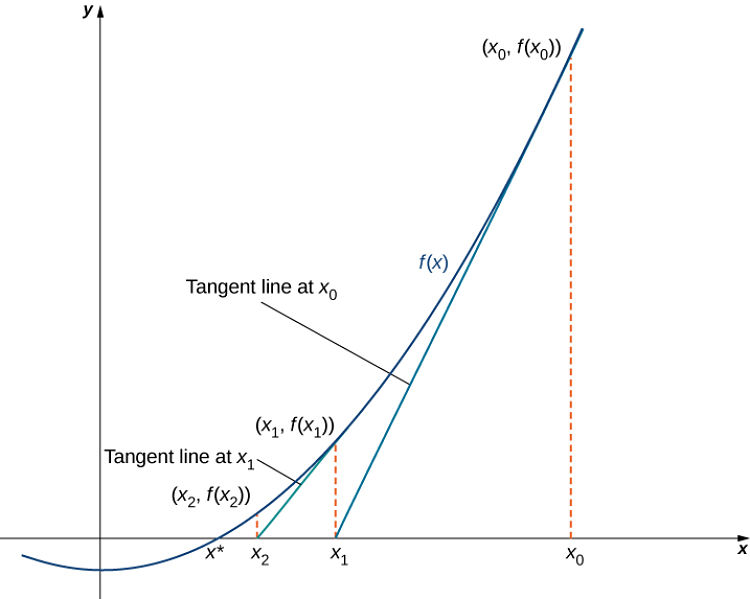


Ahora, lo que vamos a calcular son rectas tangentes. Hacer Taylor a primer orden.


### Solución Punto 1.


---


En el siguiente código, se podrá ver las condiciones de parada, de la misma manera que se había hecho en el método de bisección y de la Regla Falsa.

In [1]:
#Newton
def newton2(f, df, ErrorEsp):
  n=0
  Error3 = 10
  c= 0.001
  Listfalserule=[]
  while (Error3>ErrorEsp and 100>n):
    n=n+1
    print("Ciclo",n, ",  c=",c,",  f(c)=",f(c),"  Error Absoluto:",Error3)
    crold3 =c
    c= c-f(c)/df(c)
    Error3=abs(c-crold3)
    Listfalserule.append(Error3)
  return f(c), c, Listfalserule

###Solución Punto 2.

---
En el código anterior, podemos apreciar que podemos ingresar las condiciones de parada de nuestro método a voluntada, en el caso específico cuando queramos las condiciones dadas en el taller, Aproximaciones sucesivas con error absoluto menor a $ 10^{-6}$ o que se lleguen a 100 iteraciones como máximo, solo se deben colocar estos datos en la función de entrada.


### Solución Punto 3.

In [2]:
FNewton, xNewton, ListNewton = newton2(f,df,10e-6)

NameError: ignored

###Solución Punto 4.

In [ ]:
ListNewton

##Punto 5: Método de la Secante.

---

Presente una breve explicación teórica (utilizando ecuaciones en Latex) del método de la Secante y desarrolle un código en Python que implemente el método para solucionar el problema del ejercicio 1 y cumpla con las siguientes condiciones:


1.   Los dos puntos iniciales deben ser los extremos del intervalo seleccionado en el ejercicio 2.
2.   Las condiciones de parada son: obtener un error absoluto de las aproxima-
ciones sucesivas menor a 10−6 o realizar 100 iteraciones.
3.   Debe imprimir o mostrar cada una de las aproximaciones de la raíz obtenidas
en cada paso.
4.   Debe guardar en una lista todos los errores absolutos obtenidos en las iteraciones.




###Breve explicación.


---

Este método se basa en la fórmula de Newton-Raphson, pero evita calcular la derivada, es decir, realizamos la siguiente aproximación de la derivada:
$$ f(x_n)\approx \frac{f(x_n)-f(x)}{x_n-x}$$ 
Sustituyendo esto en la ecuación anterior, la ecuación de newton-Raphson, tenemos:
$$ x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)} ≈ x_n- \frac{f(x_n)}{\frac{f(x_n)-f(x)}{x_n-x}} $$
Obteniendo:
$$x_{n+1}=x_n- \frac{f(x_n)*(x_n-x)}{f(x_n)-f(x)} $$
Siendo esta formula, la de la secante.
Ejemplo grafico a continuación: 


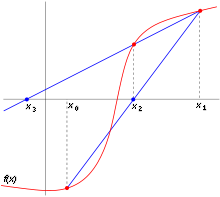

### Solución Punto 1.

In [ ]:
#Código Secante
def Secante(f, df, a, b, ErrorEsp):
  n=0
  Error4 = 10
  c= 0.001
  ListSecante=[]
  while (Error4>ErrorEsp and 100>n):
    n=n+1
    print("Ciclo",n, ",  c=",c,",  f(c)=",f(c),"  Error Absoluto:",Error4)
    crold3 =c
    c= b-f(b)*(b-a)/(f(b)-f(a))
    b=c
    Error4=abs(c-crold3)
    ListSecante.append(Error4)
  return f(c), c, ListSecante

###Solución Punto 2.


---
En el código anterior, podemos apreciar que podemos ingresar las condiciones de parada de nuestro método a voluntada, en el caso específico cuando queramos las condiciones dadas en el taller, Aproximaciones sucesivas con error absoluto menor a $ 10^{-6}$ o que se lleguen a 100 iteraciones como máximo, solo se deben colocar estos datos en la función de entrada.


### Solución Punto 3.

In [ ]:
FSecante, xSecante, ListSecante = Secante(f,df,0.1,1,10e-6)

Ciclo 1 ,  c= 0.001 ,  f(c)= -153925.46895   Error Absoluto: 10
Ciclo 2 ,  c= 0.0426989276329075 ,  f(c)= -21.628115413004515   Error Absoluto: 0.0416989276329075
Ciclo 3 ,  c= 0.04291162821369097 ,  f(c)= 0.338118412378531   Error Absoluto: 0.00021270058078346615


### Solución Punto 4

In [ ]:
ListSecante

[0.0416989276329075, 0.00021270058078346615, 3.3254017070202813e-06]

##Punto 6: Comparación y Análisis de Resultados.

---

1.   Imprima una tabla en python, que muestre de forma ordenada las aproximaciones nales obtenidas para cada uno de los métodos y comente las similitudes o diferencias obtenidas.
2.   Realice un gráco que compare las listas obtenidas en el inciso d de los
ejercicios 2, 3, 4 y 5. El gráco debe ser (iteraciones vs error abosluto), debe contener un título adecuado y la leyenda que permita identicar la línea de cada método. Analice los resultados obtenidos y concluya qué método fue más eciente en el problema presentado.



###Solución Punto 1.

In [ ]:
dicSol={
    "Bisección":xbisec,
    "Regla Falsa":xfalserule,
    "Newton-Raphson":xNewton,
    "Secante":xSecante,
}

In [ ]:
dSols=pd.DataFrame.from_dict(dicSol,orient='index', columns=["Solución",])

In [ ]:
dSols

,0
Bisección,0.042909
Regla Falsa,0.042910
Newton-Raphson,0.042908
Secante,0.042908


###Solución Punto 2.

In [ ]:
dic={'Error Bisección': ListBisec,
     'Error Regla Falsa': Listfalserule,
     'Error Newton-Raphson': ListNewton,
     'Error Secante': ListSecante,
}

In [ ]:
dE=pd.DataFrame.from_dict(dic,orient='index').transpose()

In [ ]:
from numpy.ma.core import size
dE.plot(style='o-', figsize=(12,8), lw=4, title='Errores absolutos', xlabel='Iteraciones')

##Análisis:
En la siguiente sección se realizará un análisis general, obviamente basados en los resultados obtenidos en este ejemplo, pero entendiendo que este es un caso particular y se puede cesgar la eficiencia de un método sobre otro.




*   Con el método de la bisección tenemos la ventaja de que siempre va a converge a la solución, si tenemos multiples raíces, convergera a una de estas. Es un buen método de introducción para métodos más avanzados y eficientes y sirve de un punto de comparación para el resto de resultados obtenidos. Por otra parte, como método de uso diario tiene sus desventajas, tenemos una convergencia al valor lenta y que depende mucho del intervalo de prueba escogido, también, debemos tener claro que la función depende mucho del cambio de signo para determinar una raíz, así que, calcular raíces de funciones que no tienen cambio de signo pero si tienen raíces es ineficiente con este método.


*   Elemento de lista
*   El método de newton converge extremadamente rápido y bien al valor de la función, pero tiene la gran desventaja que es que necesitamos saber cuál es la derivada de la función para poder implementar el método. También, a pesar de su alta eficiencia para cierto tipo de funciones, para otro tipos de funciones su convergencia se vuelve lenta, también en los casos donde la derivada es nula, nuetra función no permite la evaluación porque la derivación por cero no es permitida. Es un buen método pero tenemos que ir con cuidado y saber las condiciones de las funciones que mejor se adaptan a el para usarlo.


*   Hablemos del método de la secante, este es una variante del método de newton, que nos permite encontrar la solución de la raíz de una forma más rapida que los anteriore métodos, sin la necesidad de calcular una derivada, dejando esta misma como aproximación. Esto nos permite tener facilidad de calculo y definir nuestra función con operaciones básicas, no tener que tener trabajo previo para encontrar la solución de la misma. Ahora, en nuestro ejemplo, vemos que es el método más eficiente de todos los usados, esto no siempre ocurre así, porque esto es una exepción a la regla, se espera, que el método de newton sea más exacto al no realizar aproximaciónes para tener la derivada. Esta exepción a la regla se basa en las caracteristicas de esta función ejemplo. Pero, no todo es color de rosas para este método, porque al estar usando una aproximación tiene la desventaja de realizar más calculos para llegar al resultado, en contraste con otros métodos (ya explicamos porque esto no sucede en este ejemplo), También, la convergencia a la solución se ve implicada en que tan cerca se encuentra nuestra raíz de prueba del valor original y por último, el método es un poco ineficiente si tratamos con raíces multiples



#**Rerencias**

---



*   Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers (Vol. 1221). New York: Mcgraw-hill.
*   Michael T. Heath (2002). EScientific Computing: An Introductory Survey [Diapositiva de PowerPoint]. Department of Computer Science
University of Illinois at Urbana-Champaign.
*   Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.